<a href="https://colab.research.google.com/github/MarkusLC/Alamofire/blob/master/IBTU_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### **Instal and Imports**






In [ ]:
pip install mat4py


In [ ]:
pip install kneebow

In [ ]:

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import math
from mat4py import loadmat

import seaborn as sns
from numpy import unique
from numpy import where
from astropy import stats as stats
from collections import Counter
from sklearn import preprocessing
from kneebow.rotor import Rotor
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load datas**

In [ ]:
colonia = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Taiba/Colonia_SCADA_1_day/Colonia_SCADA_1_day_OPDec_Cal.csv')][0]
andorinha = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Taiba/Andorinha_SCADA_1_day/Andorinha_SCADA_1_day_OPDec_Cal.csv')][0]
aguia = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Taiba/Aguia_SCADA_1_day/Aguia_SCADA_1_day_OPDec_Cal.csv')][0]
santo_adriano = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santo_Adriano_SCADA_1_day/Santo_Adriano_SCADA_1_day_OPDec_Cal.csv')][0]
santo_barbara = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santa_Barbara_SCADA_1_day/Santa_Barbara_SCADA_1_day_OPDec_Cal.csv')][0]
santa_fatima = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santa_Fatima_SCADA_1_day/Santa_Fatima_SCADA_1_day_OPDec_Cal.csv')][0]
santa_edwiges = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santa_Edwiges_SCADA_1_day/Santa_Edwiges_SCADA_1_day_OPDec_Cal.csv')][0]
santa_regina = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santa_Regina_SCADA_1_day/Santa_Regina_SCADA_1_day_OPDec_Cal.csv')][0]
santa_albano = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santo_Albano_SCADA_1_day/Santo_Albano_SCADA_1_day_OPDec_Cal.csv')][0]
santa_angelina = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Caldeirao/Santa_Angelina_SCADA_1_day/Santa_Angelina_SCADA_1_day_OPDec_Cal.csv')][0]
icaraiI = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Icarai/Icarai_I_SCADA_1_day/Icarai_I_SCADA_1_day_OPDec_Cal.csv')][0]
icaraiII = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Icarai/Icarai_II_SCADA_1_day/Icarai_II_SCADA_1_day_OPDec_Cal.csv')][0]
ig = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Amontada/IG_SCADA_1_day/IG_SCADA_1_day_OPDec_Cal.csv')][0]
bc = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Amontada/BC_SCADA_1_day/BC_SCADA_1_day_OPDec_Cal.csv')][0]
rib = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Amontada/RIB_SCADA_1_day/RIB_SCADA_1_day_OPDec_Cal.csv')][0]
riachãoI = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Riachao/Riachao_I_SCADA_1_day/Riachao_I_SCADA_1_day_OPDec_Cal.csv')][0]
riachãoII = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Riachao/Riachao_II_SCADA_1_day/Riachao_II_SCADA_1_day_OPDec_Cal.csv')][0]
riachãoIV = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Riachao/Riachao_IV_SCADA_1_day/Riachao_IV_SCADA_1_day_OPDec_Cal.csv')][0]
riachãoVI = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Riachao/Riachao_VI_SCADA_1_day/Riachao_VI_SCADA_1_day_OPDec_Cal.csv')][0]
riachãoVII = [pd.read_csv('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT/Riachao/Riachao_VII_SCADA_1_day/Riachao_VII_SCADA_1_day_OPDec_Cal.csv')][0]




In [ ]:
colonia

,Timestamps,PotTotal
0,2019-08-01,NaN
1,2019-08-02,NaN
2,2019-08-03,NaN
3,2019-08-04,NaN
4,2019-08-05,NaN
...,...,...
483,2020-11-26,13937.868056
484,2020-11-27,15565.556250
485,2020-11-28,14954.848611
486,2020-11-29,15673.296528


### **Data manipulation**

In [ ]:
def matToDataFrame(name):
    data = loadmat( name + '.mat' )

    data = data['OP_Dec'] 
    data = data['Cal'] 
    dataPot = data['PotTotal'] 
    dataPot = dataPot['bruta'] 
    dataPot = dataPot['DADOS']
    dataPot = dataPot['avg'] 
    potTotal = 0
    count = 0
    for pot in dataPot:
        pot = np.array(pot)
        if (math.isnan(pot.flat[0])):
            pot.flat[0] = 0
            count += 1
        potTotal += pot
    dataPot = potTotal/(len(dataPot)-count)

    dataWS = data['WTG'][0] 
    dataWS = dataWS['DADOS']
    dataWS = dataWS['WS']
    dataWS = dataWS['avg']
    wSx = 0
    wSy = 0
    wSz = 0
    count = 0
    for wind in dataWS:
        wind = np.array(wind)
        windX = wind.flat[0]
        windY = 0
        windZ = 0
        if (len(wind) >2):
            windY = wind.flat[1]
            windZ = wind.flat[2]
       
        if (math.isnan(wind.flat[0]) and wind.flat[0] != None):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


               
        if (len(wind) >1 and math.isnan(wind.flat[1])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        if ( len(wind) >2 != None and math.isnan(wind.flat[2])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        wSx += windX
        wSy += windY
        wSz += windZ 
    wSx = wSx/(len(dataWS) - count) 
    wSy = wSy/(len(dataWS) - count) 
    wSz = wSz/(len(dataWS) - count) 

    if (wSz != 0):
        dataWS = ((wSx**2 + wSz**2)**0.5 +wSy**2)**0.5
    else:
        dataWS = wSx
    
    dataWD = data['WTG'][0] 
    dataWD = dataWD['DADOS']
    dataWD = dataWD['WS']
    dataWD = dataWD['avg']
    
    wSx = 0
    wSy = 0
    wSz = 0
    count = 0
    for wind in dataWD:
        wind = np.array(wind)
        windX = wind.flat[0]
        windY = 0
        windZ = 0
        if (len(wind) >2):
            windY = wind.flat[1]
            windZ = wind.flat[2]
       
        if (math.isnan(wind.flat[0]) and wind.flat[0] != None):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


               
        if (len(wind) >1 and math.isnan(wind.flat[1])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        if ( len(wind) >2 != None and math.isnan(wind.flat[2])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        wSx += windX
        wSy += windY
        wSz += windZ 

    wSx = wSx/(len(dataWD) - count) 
    wSy = wSy/(len(dataWD) - count) 
    wSz = wSz/(len(dataWD) - count) 
    dataWD = ((wSx**2 + wSz**2)**0.5 +wSy**2)**0.5

    
    dataset = pd.DataFrame({'Velocidade': dataWS, 'PotTotal': dataPot,'Direção': dataWD})
    dataset = dataset.explode('PotTotal')


    return dataset

In [ ]:
colonia = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Colonia_SCADA_1day')
andorinha = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Andorinha_SCADA_1mo')
aguia = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Aguia_SCADA_1mo')
santo_adriano = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santo_Adriano_SCADA_1mo')
santo_barbara = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Barbara_SCADA_1mo')
santa_fatima = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Fatima_SCADA_1mo')
santa_edwiges = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Edwiges_SCADA_1mo')
santa_regina = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Regina_SCADA_1mo')
santa_albano = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santo_Albano_SCADA_1mo')
santa_angelina = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Angelina_SCADA_1mo')
icaraiI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Icarai (1)/Icarai_I_SCADA_1mo')
icaraiII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Icarai (1)/Icarai_II_SCADA_1mo')
ig = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/IG_SCADA_1mo')
bc = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/BC_SCADA_1mo')
rib = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/RIB_SCADA_1mo')
riachãoI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_I_SCADA_1mo')
riachãoII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_II_SCADA_1mo')
riachãoIV = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_IV_SCADA_1mo')
riachãoVI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_VI_SCADA_1mo')
riachãoVII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_VII_SCADA_1mo')




In [ ]:
def matToDataFrameTest(name):
    data = loadmat( name + '.mat' )

    data = data['OP_Dec'] 
    data = data['Cal'] 
    dataPot = data['PotTotal'] 
    dataPot = dataPot['bruta'] 
    dataPot = dataPot['DADOS']
    dataPot = dataPot['avg'] 

    dataWS = data['WTG'][0] 
    dataWS = dataWS['DADOS']
    dataWS = dataWS['WS']
    dataWS = dataWS['avg']

    dataWD = data['WTG'][0] 
    dataWD = dataWD['DADOS']
    dataWD = dataWD['WS']
    dataWD = dataWD['avg']

    dataWind = []
    wSx = 0
    wSy = 0
    wSz = 0
    count = 0
    for wind in dataWS:
        wind = np.array(wind)
        windX = wind.flat[0]
        windY = 0
        windZ = 0
        if (len(wind) >2):
            windY = wind.flat[1]
            windZ = wind.flat[2]
       
        if (math.isnan(wind.flat[0]) and wind.flat[0] != None):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


               
        if (len(wind) >1 and math.isnan(wind.flat[1])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        if ( len(wind) >2 != None and math.isnan(wind.flat[2])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1
        
        wSx = windX
        wSy = windY
        wSz = windZ 
        dataWDSQRT = ((wSx**2 + wSz**2)**0.5 +wSy**2)**0.5
        dataWind.append(dataWDSQRT)
    
    
    dataWindDiraction = []
    wSx = 0
    wSy = 0
    wSz = 0
    count = 0
    for wind in dataWD:
        wind = np.array(wind)
        windX = wind.flat[0]
        windY = 0
        windZ = 0
        if (len(wind) >2):
            windY = wind.flat[1]
            windZ = wind.flat[2]
       
        if (math.isnan(wind.flat[0]) and wind.flat[0] != None):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


               
        if (len(wind) >1 and math.isnan(wind.flat[1])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1


        if ( len(wind) >2 != None and math.isnan(wind.flat[2])):
            windX = 0
            windY = 0
            windZ = 0
            count += 1
        
        wSx = windX
        wSy = windY
        wSz = windZ 
        dataWDSQRT = ((wSx**2 + wSz**2)**0.5 +wSy**2)**0.5
        dataWindDiraction.append(dataWDSQRT)


    
    dataset = pd.DataFrame({'Velocidade': dataWind, 'PotTotal': dataPot,'Direção': dataWindDiraction})
    dataset = dataset.explode('PotTotal')


    return dataset


In [ ]:
colonia = matToDataFrameTest('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Colonia_SCADA_1_day')
colonia = colonia[colonia['PotTotal'].notna()]
colonia = colonia[(colonia != 0).all(1)]
andorinha = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Andorinha_SCADA_1_day')
andorinha = andorinha[andorinha['PotTotal'].notna()]
andorinha = andorinha[(andorinha != 0).all(1)]
aguia = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Taiba (1)/Aguia_SCADA_1_day')
aguia = aguia[aguia['PotTotal'].notna()]
aguia = aguia[(aguia != 0).all(1)]
santo_adriano = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santo_Adriano_SCADA_1_day')
santo_adriano = santo_adriano[santo_adriano['PotTotal'].notna()]
santo_adriano = santo_adriano[(santo_adriano != 0).all(1)]
santo_barbara = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Barbara_SCADA_1_day')
santo_barbara = santo_barbara[santo_barbara['PotTotal'].notna()]
santo_barbara = santo_barbara[(santo_barbara != 0).all(1)]
santa_fatima = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Fatima_SCADA_1_day')
santa_fatima = santa_fatima[santa_fatima['PotTotal'].notna()]
santa_fatima = santa_fatima[(santa_fatima != 0).all(1)]
santa_edwiges = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Edwiges_SCADA_1_day')
santa_edwiges = santa_edwiges[santa_edwiges['PotTotal'].notna()]
santa_edwiges = santa_edwiges[(santa_edwiges != 0).all(1)]
santa_regina = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Regina_SCADA_1_day')
santa_regina = santa_regina[santa_regina['PotTotal'].notna()]
santa_regina = santa_regina[(santa_regina != 0).all(1)]
santa_albano = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santo_Albano_SCADA_1_day')
santa_albano = santa_albano[santa_albano['PotTotal'].notna()]
santa_albano = santa_albano[(santa_albano != 0).all(1)]
santa_angelina = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Caldeirao (1)/Santa_Angelina_SCADA_1_day')
santa_angelina = santa_angelina[(santa_angelina != 0).all(1)]
santa_angelina = santa_angelina[santa_angelina['PotTotal'].notna()]
icaraiI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Icarai (1)/Icarai_I_SCADA_1_day')
icaraiI = icaraiI[icaraiI['PotTotal'].notna()]
icaraiI = icaraiI[(icaraiI != 0).all(1)]
icaraiII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Icarai (1)/Icarai_II_SCADA_1_day')
icaraiII = icaraiII[icaraiII['PotTotal'].notna()]
icaraiII = icaraiII[(icaraiII != 0).all(1)]
ig = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/IG_SCADA_1_day')
ig = ig[ig['PotTotal'].notna()]
ig = ig[(ig != 0).all(1)]
bc = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/BC_SCADA_1_day')
bc = bc[bc['PotTotal'].notna()]
bc = bc[(bc != 0).all(1)]
rib = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Amontada (1)/RIB_SCADA_1_day')
rib = rib[rib['PotTotal'].notna()]
rib = rib[(rib != 0).all(1)]
riachãoI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_I_SCADA_1_day')
riachãoI = riachãoI[riachãoI['PotTotal'].notna()]
riachãoI = riachãoI[(riachãoI != 0).all(1)]
riachãoII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_II_SCADA_1_day')
riachãoII = riachãoII[riachãoII['PotTotal'].notna()]
riachãoII = riachãoII[(riachãoII != 0).all(1)]
riachãoIV = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_IV_SCADA_1_day')
riachãoIV = riachãoIV[riachãoIV['PotTotal'].notna()]
riachãoIV = riachãoIV[(riachãoIV != 0).all(1)]
riachãoVI = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_VI_SCADA_1_day')
riachãoVI = riachãoVI[riachãoVI['PotTotal'].notna()]
riachãoVI = riachãoVI[(riachãoVI != 0).all(1)]
riachãoVII = matToDataFrame('/content/drive/My Drive/Dados parques/DadosIBTU/SCADA_TesteCFT (1)/Riachao (1)/Riachao_VII_SCADA_1_day')
riachãoVII = riachãoVII[riachãoVII['PotTotal'].notna()]
riachãoVII = riachãoVII[(riachãoVII != 0).all(1)]

In [ ]:
colonia = colonia.to_csv("Colonia_SCADA_1_day", sep='\t')

### merge

In [ ]:
def mergeAllDatas():
    arrayResult = []
    for i in range(0,len(colonia)):
        Potencia = [colonia['PotTotal'][i],andorinha['PotTotal'][i],aguia['PotTotal'][i],santo_adriano['PotTotal'][i],santo_barbara['PotTotal'][i],
            santa_fatima['PotTotal'][i],santa_edwiges['PotTotal'][i],santa_regina['PotTotal'][i],santa_albano['PotTotal'][i],
            santa_angelina['PotTotal'][i],icaraiI['PotTotal'][i],icaraiII['PotTotal'][i],
            icaraiI['PotTotal'][i],ig['PotTotal'][i],bc['PotTotal'][i],rib['PotTotal'][i],
            riachãoI['PotTotal'][i],riachãoII['PotTotal'][i],riachãoIV['PotTotal'][i],riachãoVI['PotTotal'][i],riachãoVII['PotTotal'][i]]

        Velocidade = [colonia['Velocidade'][i],andorinha['Velocidade'][i],aguia['Velocidade'][i],santo_adriano['Velocidade'][i],santo_barbara['Velocidade'][i],
            santa_fatima['Velocidade'][i],santa_edwiges['Velocidade'][i],santa_regina['Velocidade'][i],santa_albano['Velocidade'][i],
            santa_angelina['Velocidade'][i],icaraiI['Velocidade'][i],icaraiII['Velocidade'][i],
            icaraiI['Velocidade'][i],ig['Velocidade'][i],bc['Velocidade'][i],rib['Velocidade'][i],
            riachãoI['Velocidade'][i],riachãoII['Velocidade'][i],riachãoIV['Velocidade'][i],riachãoVI['Velocidade'][i],riachãoVII['Velocidade'][i]]

        direcao = [colonia['Direção'][i],andorinha['Direção'][i],aguia['Direção'][i],santo_adriano['Direção'][i],santo_barbara['Direção'][i],
            santa_fatima['Direção'][i],santa_edwiges['Direção'][i],santa_regina['Direção'][i],santa_albano['Direção'][i],
            santa_angelina['Direção'][i],icaraiI['Direção'][i],icaraiII['Direção'][i],
            icaraiI['Direção'][i],ig['Direção'][i],bc['Direção'][i],rib['Direção'][i],
            riachãoI['Direção'][i],riachãoII['Direção'][i],riachãoIV['Direção'][i],riachãoVI['Direção'][i],riachãoVII['Direção'][i]]

        Parque = ['colonia','andorinha','aguia','santo_adriano','santo_barbara','santa_fatima','santa_edwiges',
            'santa_regina','santa_albano','santa_angelina','icaraiI','icaraiII','icaraiI',
            'ig','bc','rib','riachãoI','riachãoII','riachãoIV','riachãoVI','riachãoVII']



        TesteDataFrame = pd.DataFrame({'Velocidade': Velocidade,'Direção':direcao,'Potencia': Potencia, 'Parque': Parque})
        TesteDataFrame = TesteDataFrame.fillna(0)
        arrayResult.append(TesteDataFrame)
    return arrayResult

In [ ]:
dataFramesToCluster = mergeAllDatas()

In [ ]:
def findTheBestNumberOfClusters(dataSet):
    arrayNumerosDeClusters = []
    for sample in dataSet:
        neigh = NearestNeighbors(n_neighbors=2)
        nbrs = neigh.fit((sample[['Velocidade','Direção','Potencia']]))
        distances, indices = nbrs.kneighbors((sample[['Velocidade','Direção','Potencia']]))
        distances = np.sort(distances, axis=0)    
        distances = distances[:,1]
        plt.plot(distances)

    return arrayNumerosDeClusters

[0. 0.]


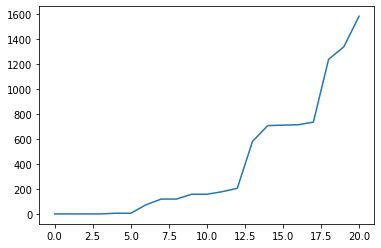

In [ ]:
numberOfCluster = findTheBestNumberOfClusters(dataFramesToCluster)


### **Clustering**

In [ ]:
def useKmeans(dataSetNorm):
    for sample in dataSetNorm:
        kmeans = KMeans(n_clusters=8).fit((sample[['Velocidade','Direção','Potencia']]))
        centroids = kmeans.cluster_centers_
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(sample['Velocidade'],sample['Direção'], sample['Potencia'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
        # ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()
        teste = sample[['Velocidade','Direção','Potencia']]
        fig = px.scatter_3d(teste, x='Velocidade', y='Direção', z='Potencia', color= kmeans.labels_, size='Potencia', opacity=1)
        # px.scatter(centroids[:, 0], centroids[:, 1], color='red', s=50)
        fig.show()

        sample['Grupo'] = kmeans.labels_
    return dataSetNorm

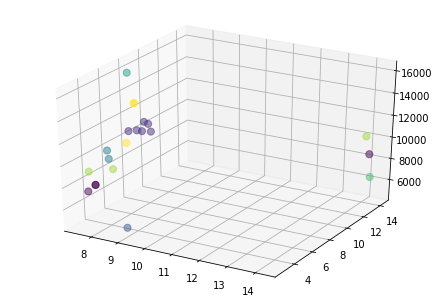

[    Velocidade    Direção      Potencia          Parque  Grupo
 0    14.159791  14.159791   8570.185520         colonia      0
 1    14.204592  14.204592   6417.805775       andorinha      5
 2    14.051918  14.051918  10226.043354           aguia      6
 3     8.975320   2.995884   4838.090807   santo_adriano      2
 4     9.136268   3.022626  13686.219913   santo_barbara      1
 5     9.673273   3.110189  14699.347909    santa_fatima      1
 6     9.422237   3.069566  13868.946628   santa_edwiges      1
 7     9.898907   3.146253  13941.753878    santa_regina      1
 8     9.813659   3.132676  14580.702253    santa_albano      1
 9     9.597975   3.098060  13863.568278  santa_angelina      1
 10    7.626332   7.626332  13324.481660         icaraiI      7
 11    7.463509   7.463509  16034.409892        icaraiII      4
 12    7.626332   7.626332  13324.481660         icaraiI      7
 13    7.910037   2.812479   8365.833338              ig      0
 14    7.910037   2.812479   8365.833338

In [ ]:
kmeansCluster = useKmeans(dataFramesToCluster)
kmeansCluster

In [ ]:
def useDBSCAN(dataSetNorm):
    for sample in dataSetNorm:
        DBSCANC = DBSCAN(eps=700, min_samples=3).fit((sample[['Velocidade','Direção','Potencia']]))
        print(DBSCANC)
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(sample['Velocidade'],sample['Direção'], sample['Potencia'], c= DBSCANC.labels_.astype(float), s=50, alpha=0.5)
        # ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()
        teste = sample[['Velocidade','Direção','Potencia']]
        fig = px.scatter_3d(teste, x='Velocidade', y='Direção', z='Potencia', color= DBSCANC.labels_, size='Potencia', opacity=1)
        # px.scatter(centroids[:, 0], centroids[:, 1], color='red', s=50)
        fig.show()

        sample['Grupo'] = DBSCANC.labels_
    return dataSetNorm

DBSCAN(algorithm='auto', eps=700, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)


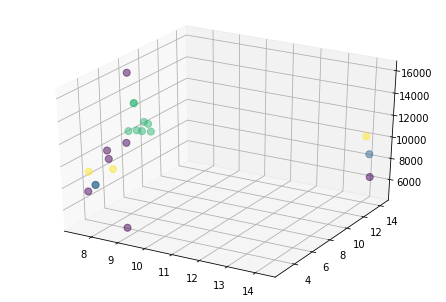

[    Velocidade    Direção      Potencia          Parque  Grupo
 0    14.159791  14.159791   8570.185520         colonia      0
 1    14.204592  14.204592   6417.805775       andorinha     -1
 2    14.051918  14.051918  10226.043354           aguia      2
 3     8.975320   2.995884   4838.090807   santo_adriano     -1
 4     9.136268   3.022626  13686.219913   santo_barbara      1
 5     9.673273   3.110189  14699.347909    santa_fatima      1
 6     9.422237   3.069566  13868.946628   santa_edwiges      1
 7     9.898907   3.146253  13941.753878    santa_regina      1
 8     9.813659   3.132676  14580.702253    santa_albano      1
 9     9.597975   3.098060  13863.568278  santa_angelina      1
 10    7.626332   7.626332  13324.481660         icaraiI      1
 11    7.463509   7.463509  16034.409892        icaraiII     -1
 12    7.626332   7.626332  13324.481660         icaraiI      1
 13    7.910037   2.812479   8365.833338              ig      0
 14    7.910037   2.812479   8365.833338

In [ ]:
DBSCANCluster = useDBSCAN(dataFramesToCluster)
DBSCANCluster

In [ ]:
def useSpectraClustering(dataSetNorm2):
    for sample2 in dataSetNorm2:
        spectral = SpectralClustering(n_clusters=8).fit(preprocessing.normalize(sample2[['Velocidade','Potencia','Direção']]))
        fig = plt.figure()
        ax = Axes3D(fig)
        ax.scatter(sample2['Velocidade'], sample2['Potencia'],sample2['Direção'], c= spectral.labels_.astype(float), s=50, alpha=0.5)
        # ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()
        teste = sample2[['Velocidade','Potencia','Direção']]
        fig = px.scatter_3d(teste, x='Velocidade', y='Potencia', z='Direção', color= spectral.labels_, size='Potencia', opacity=1)
        fig.show()
        sample2['Grupo'] = spectral.labels_
    return dataSetNorm2

In [ ]:
spectralCluster = useSpectraClustering(dataFramesToCluster)
spectralCluster

In [ ]:
def divideByGroup(dataClustered):
    testeGrupos = []
    for sample in dataClustered:
        grupo1 = sample[sample['Grupo'] == 0]['Parque'].to_list()
        str1 = '/'.join(grupo1)
        # testeGrupos.append(str1)
        grupo2 = sample[sample['Grupo'] == 1]['Parque'].to_list()
        str2 = '/'.join(grupo2)
        # testeGrupos.append(str2)
        grupo3 = sample[sample['Grupo'] == 2]['Parque'].to_list()
        str3 = '/'.join(grupo3)
        # testeGrupos.append(str3)
        grupo4 = sample[sample['Grupo'] == 3]['Parque'].to_list()
        str4 = '/'.join(grupo4)
        # testeGrupos.append(str4)
        grupo5 = sample[sample['Grupo'] == 4]['Parque'].to_list()
        str5 = '/'.join(grupo5)
        grupo6 = sample[sample['Grupo'] == 5]['Parque'].to_list()
        str6 = '/'.join(grupo6)
        grupo7 = sample[sample['Grupo'] == 6]['Parque'].to_list()
        str7 = '/'.join(grupo7)
        grupo8 = sample[sample['Grupo'] == 7]['Parque'].to_list()
        str8 = '/'.join(grupo8)
        # testeGrupos.append(str5)
        ok = [str1,str2,str3,str4,str5,str6,str7,str8]
        str6 = ','.join(ok)
        testeGrupos.append(str6)
    dataFrameGrupos = pd.DataFrame(testeGrupos) 
    return testeGrupos

In [ ]:
def mostCommonGroups(data):
    resultDivideByGroup = divideByGroup(data)
    result = Counter(resultDivideByGroup)
    arrayMostCommun = []
    arrayCopy = []
    for group in result.most_common():
    
        arrayCopy.append([group,False])

    sum = 0
    for group in arrayCopy:
        if group[1] == False:

            sum = group[0][1]
            for groupCompare in arrayCopy[1:]:

                if set(group[0][0].split(',')) == set(groupCompare[0][0].split(',')):
                    sum += groupCompare[0][1]
                    groupCompare[1] = True
            arrayMostCommun.append([group[0],sum])
    return arrayMostCommun


In [ ]:
groupsByKmeans = mostCommonGroups(kmeansCluster)
groupsByKmeans[0][0][0]
finalGroups = groupsByKmeans[0][0][0]
finalDataFrame = kmeansCluster[0]
finalGroups

'colonia/ig/bc/rib,santo_barbara/santa_fatima/santa_edwiges/santa_regina/santa_albano/santa_angelina,santo_adriano,riachãoIV/riachãoVI,icaraiII,andorinha,aguia/riachãoII/riachãoVII,icaraiI/icaraiI/riachãoI'

In [ ]:
final = []
for sample in kmeansCluster:
    grupo1 = sample[sample['Grupo'] == 0]
    str1 = '/'.join(grupo1)
    # testeGrupos.append(str1)
    grupo2 = sample[sample['Grupo'] == 1]
    str2 = '/'.join(grupo2)
    # testeGrupos.append(str2)
    grupo3 = sample[sample['Grupo'] == 2]
    str3 = '/'.join(grupo3)
    # testeGrupos.append(str3)
    grupo4 = sample[sample['Grupo'] == 3]
    str4 = '/'.join(grupo4)
    # testeGrupos.append(str4)
    grupo5 = sample[sample['Grupo'] == 4]
    str5 = '/'.join(grupo5)
    grupo6 = sample[sample['Grupo'] == 5]
    str6 = '/'.join(grupo6)
    grupo7 = sample[sample['Grupo'] == 6]
    str7 = '/'.join(grupo7)
    grupo8 = sample[sample['Grupo'] == 7]
    final = [grupo1,grupo2,grupo3,grupo4,grupo5,grupo6,grupo7,grupo8]
for prin in final:
    print("")
    print(prin)
    

Encontrando o representante do grupo
Usaremos o representante com a menor disperção entre os participantes


In [ ]:
# divisao dos grupos
finalGroupsSplit = finalGroups.split(",")
count = 0
representantes = []
for group in finalGroupsSplit:
    windFarms = group.split("/")
    disper = []
   
    for farm in windFarms:
        groupDataFrame = finalDataFrame.loc[finalDataFrame['Grupo'] == count]
        representante = finalDataFrame.loc[finalDataFrame['Parque'] == farm]
        sum  = groupDataFrame['Potencia'].sum(axis = 0)

        representanteX4 = representante.iloc[0]['Potencia']*4
        value = representanteX4 - sum
        disper.append(abs(value))
    minValue = min(disper)
    indexMin = disper.index(minValue)
    representantes.append(windFarms[indexMin])
representantes



['ig',
 'santo_barbara',
 'santo_adriano',
 'riachãoIV',
 'icaraiII',
 'andorinha',
 'riachãoVII',
 'riachãoI']